# Delhi Metro Network Analysis

Process We Can Follow:

Analyzing the metro network in a city like Delhi helps improve urban transportation infrastructure, leading to better city planning and enhanced commuter experiences. Below is the process we can follow for the task of Metro Network Analysis of Delhi:


In [1]:
# 1.Determine what you want to achieve. It could be optimizing routes, reducing congestion, improving passenger flow, or understanding travel patterns.
# 2.Collect data on metro lines, stations, connections, and transit schedules.
# 3.Clean the data for inconsistencies, missing values, or errors.
# 4.Create visual representations of the network, such as route maps, passenger flow charts, or heat maps of station congestion.
# 5.Analyze how effectively the network handles passenger traffic and meets operational targets.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')
import folium
import warnings
warnings.filterwarnings('ignore')

In [3]:
metro_data = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\Delhi-Metro-Network.csv")

In [4]:
metro_data.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [5]:
metro_data.shape

(285, 8)

In [6]:
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                285 non-null    int64  
 1   Station Name              285 non-null    object 
 2   Distance from Start (km)  285 non-null    float64
 3   Line                      285 non-null    object 
 4   Opening Date              285 non-null    object 
 5   Station Layout            285 non-null    object 
 6   Latitude                  285 non-null    float64
 7   Longitude                 285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [7]:
metro_data.describe()

,Station ID,Distance from Start (km),Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,143.000000,19.218947,28.595428,77.029315
std,82.416625,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,72.000000,7.300000,28.545828,77.107130
50%,143.000000,17.400000,28.613453,77.207220
75%,214.000000,28.800000,28.666360,77.281165
max,285.000000,52.700000,28.878965,77.554479


In [8]:
# checking for missing values
metro_data.isnull().sum()

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [9]:
metro_data.dtypes

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [10]:
# Now, I’ll convert the Opening Date column to a datetime format for ease of analysis: 

metro_data['Opening Date'] = pd.to_datetime(metro_data['Opening Date'])

# Geospatial Analysis

In [11]:
metro_data['Line'].value_counts()

Line
Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Aqua line            21
Green line           21
Rapid Metro          11
Blue line branch      8
Orange line           6
Gray line             3
Green line branch     3
Name: count, dtype: int64

In [12]:
# defining Line colors scheme for the metro lines

In [13]:
line_colors = { 'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'}

In [14]:
delhi_map_with_line_tooltip = folium.Map(location = [28.7041, 77.1025], zoom_start = 11)

In [15]:
# adding colored markers for each metro station with line name in tooltip

for index, row in metro_data.iterrows():
    line = row["Line"]
    color = line_colors.get(line, 'black')   # Default color is black if line not found in the dictionary
    folium.Marker(
        location = [row["Latitude"], row['Longitude']],
        popup = f"{row['Station Name']}",
        tooltip = f"{row['Station Name']}, {line}",
        icon = folium.Icon(color = color)
    ).add_to(delhi_map_with_line_tooltip)

In [16]:
delhi_map_with_line_tooltip

Here is the map showing the geographical distribution of Delhi Metro stations. Each marker represents a metro station, and you can hover over or click on the markers to see the station name and the metro line it belongs to. This map provides a visual understanding of how the metro stations are spread across Delhi.

# Temporal Analysis

Now, I will analyze the growth of the Delhi Metro network over time. I’ll look at how many stations were opened each year and visualize this growth. It can provide insights into the pace of metro network expansion and its development phases.

I’ll start by extracting the year from the Opening Date and then count the number of stations opened each year. Following this, I’ll visualize this information in a bar plot. Let’s proceed with this analysis:

In [17]:
metro_data['Opening Year'] = metro_data['Opening Date'].dt.year

In [18]:
# counting the number of stations opened each year

metro_data['Opening Year'].value_counts()

Opening Year
2018    64
2010    54
2019    37
2005    28
2017    18
2009    17
2011    13
2015    13
2004    11
2006     9
2002     6
2013     5
2003     4
2008     3
2014     3
Name: count, dtype: int64

In [19]:
stations_per_year = metro_data['Opening Year'].value_counts().sort_index()

In [20]:
stations_per_year

Opening Year
2002     6
2003     4
2004    11
2005    28
2006     9
2008     3
2009    17
2010    54
2011    13
2013     5
2014     3
2015    13
2017    18
2018    64
2019    37
Name: count, dtype: int64

In [21]:
stations_per_year_df = stations_per_year.reset_index()
stations_per_year_df

,Opening Year,count
0,2002,6
1,2003,4
2,2004,11
3,2005,28
4,2006,9
5,2008,3
6,2009,17
7,2010,54
8,2011,13
9,2013,5


In [22]:
stations_per_year_df.columns = ['Year', 'Number of Stations']

In [23]:
stations_per_year_df

,Year,Number of Stations
0,2002,6
1,2003,4
2,2004,11
3,2005,28
4,2006,9
5,2008,3
6,2009,17
7,2010,54
8,2011,13
9,2013,5


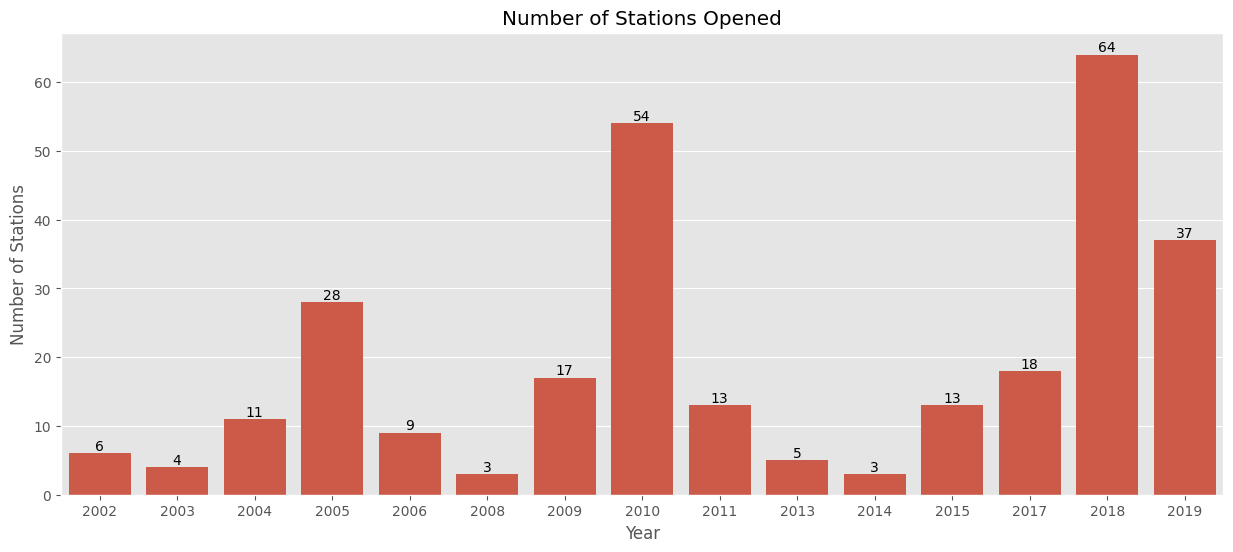

In [24]:
plt.figure( figsize = (15,6))
ax = sns.barplot( stations_per_year_df , x = 'Year', y = 'Number of Stations')
plt.title('Number of Stations Opened')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

The bar chart illustrates the number of Delhi Metro stations opened each year. This visualization helps us understand the temporal development of the metro network. Some key observations include:

1.Some years show a significant number of new station openings, indicating phases of rapid network expansion.

2.Conversely, there are years with few or no new stations, which could be due to various factors like planning, funding, or construction challenges.
Line Analysis

Now, I’ll analyze the various metro lines in terms of the number of stations they have and the average distance between stations. It will give us insights into the characteristics of each metro line, such as which lines are more extensive or denser.

I’ll calculate the number of stations per line and the average distance between stations on each line. I’ll then visualize these metrics to better understand the differences between the lines. Let’s start with these calculations:

In [25]:
stations_per_line = metro_data['Line'].value_counts()
stations_per_line

Line
Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Aqua line            21
Green line           21
Rapid Metro          11
Blue line branch      8
Orange line           6
Gray line             3
Green line branch     3
Name: count, dtype: int64

In [26]:
# calculating the total distance of each metro line (max distance from start)

total_distance_per_line = metro_data.groupby('Line').max()['Distance from Start (km)']
total_distance_per_line

Line
Aqua line            27.1
Blue line            52.7
Blue line branch      8.1
Gray line             3.9
Green line           24.8
Green line branch     2.1
Magenta line         33.1
Orange line          20.8
Pink line            52.6
Rapid Metro          10.0
Red line             32.7
Voilet line          43.5
Yellow line          45.7
Name: Distance from Start (km), dtype: float64

In [27]:
avg_distance_per_line = total_distance_per_line / (stations_per_line-1)
avg_distance_per_line

Line
Aqua line            1.355000
Blue line            1.097917
Blue line branch     1.157143
Gray line            1.950000
Green line           1.240000
Green line branch    1.050000
Magenta line         1.379167
Orange line          4.160000
Pink line            1.421622
Rapid Metro          1.000000
Red line             1.167857
Voilet line          1.318182
Yellow line          1.269444
dtype: float64

In [28]:
line_analysis = pd.DataFrame({'line': stations_per_line.index,
                             'Number of Stations': stations_per_line.values,
                              'Avg Distance Between Station (km)': avg_distance_per_line})

In [29]:
line_analysis

,line,Number of Stations,Avg Distance Between Station (km)
Line,,,
Aqua line,Blue line,49,1.355000
Blue line,Pink line,38,1.097917
Blue line branch,Yellow line,37,1.157143
Gray line,Voilet line,34,1.950000
Green line,Red line,29,1.240000
Green line branch,Magenta line,25,1.050000
Magenta line,Aqua line,21,1.379167
Orange line,Green line,21,4.160000
Pink line,Rapid Metro,11,1.421622


In [30]:
# sorting the DataFrame by the number of stations
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)
line_analysis

,line,Number of Stations,Avg Distance Between Station (km)
Line,,,
Aqua line,Blue line,49,1.355000
Blue line,Pink line,38,1.097917
Blue line branch,Yellow line,37,1.157143
Gray line,Voilet line,34,1.950000
Green line,Red line,29,1.240000
Green line branch,Magenta line,25,1.050000
Magenta line,Aqua line,21,1.379167
Orange line,Green line,21,4.160000
Pink line,Rapid Metro,11,1.421622


In [31]:
line_analysis.reset_index(drop=True, inplace=True)
line_analysis

,line,Number of Stations,Avg Distance Between Station (km)
0,Blue line,49,1.355000
1,Pink line,38,1.097917
2,Yellow line,37,1.157143
3,Voilet line,34,1.950000
4,Red line,29,1.240000
5,Magenta line,25,1.050000
6,Aqua line,21,1.379167
7,Green line,21,4.160000
8,Rapid Metro,11,1.421622
9,Blue line branch,8,1.000000


The table presents a detailed analysis of the Delhi Metro lines, including the number of stations on each line and the average distance between stations.

To better understand these metrics, let’s visualize them. I’ll create two plots: one for the number of stations per line and another for the average distance between stations. It will provide a comparative view of the metro lines:

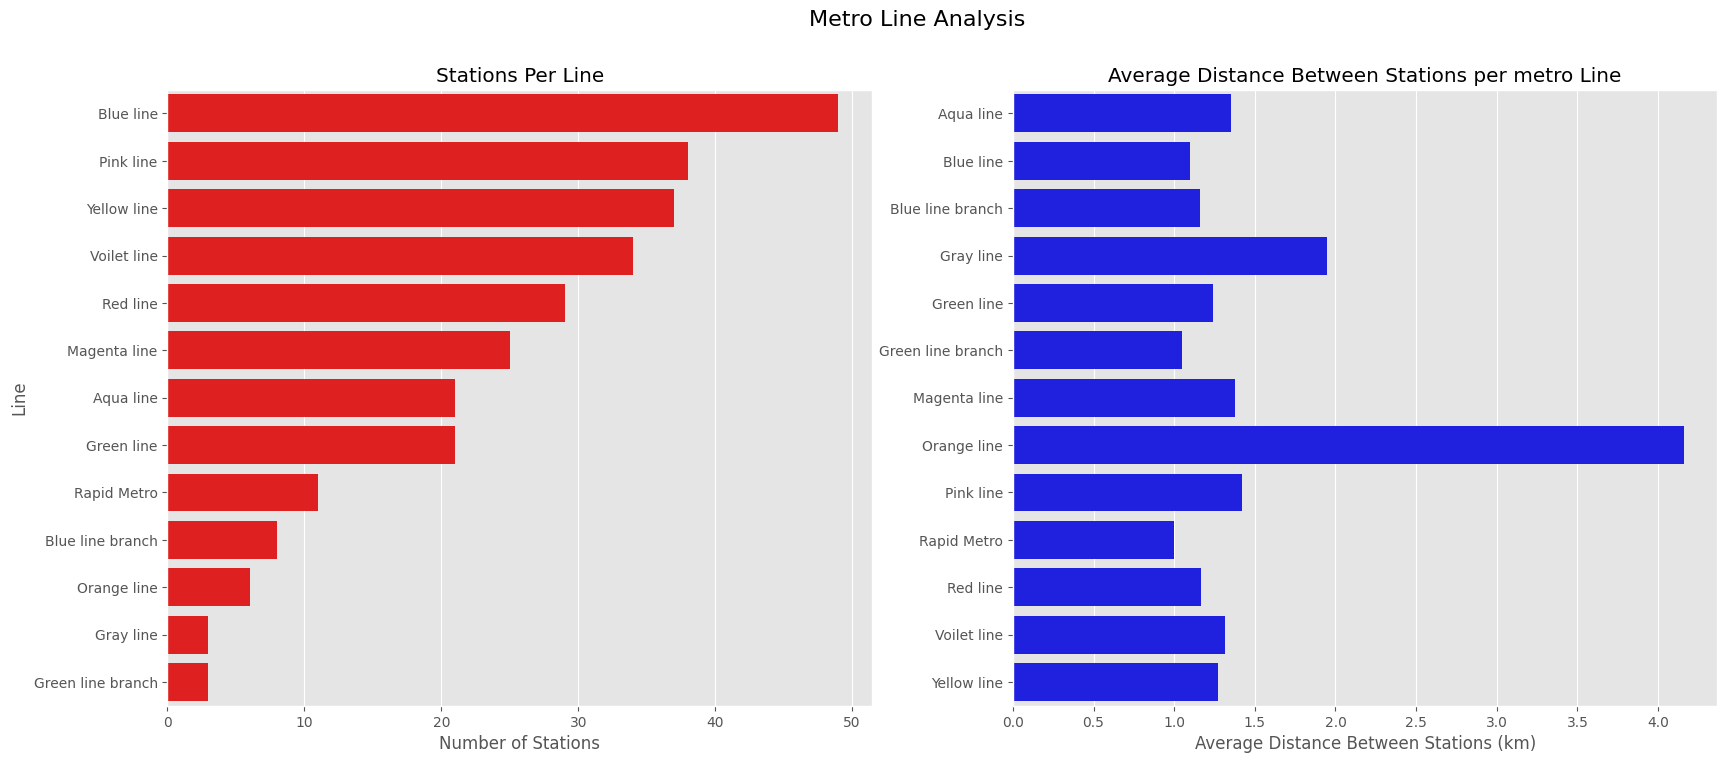

In [32]:
plt.figure( figsize= (20,8))

plt.subplot(1,2,1)
sns.barplot(y = stations_per_line.index , x = stations_per_line.values , color = 'Red')
plt.title( 'Stations Per Line')
plt.xlabel('Number of Stations')

plt.subplot(1,2,2)
sns.barplot(y = avg_distance_per_line.index , x = avg_distance_per_line.values, color = "Blue" )
plt.title("Average Distance Between Stations per metro Line")
plt.xlabel("Average Distance Between Stations (km)")
plt.ylabel('')

plt.suptitle('Metro Line Analysis', fontsize=16)

plt.savefig(r"C:\Users\areeb\Downloads\Metro Line Analysis.png" , bbox_inches='tight')
plt.show()

# Station Layout Analysis

Next, I’ll explore the station layouts (Elevated, Ground Level, Underground). I’ll analyze the distribution of these layouts across the network and see if there are any patterns or trends, such as certain lines favouring a particular layout.

I’ll calculate the frequency of each layout type and then visualize these frequencies to get a clearer picture of the layout distribution. Let’s proceed with this:

In [33]:
layout_counts = metro_data['Station Layout'].value_counts()
layout_counts

Station Layout
Elevated       214
Underground     68
At-Grade         3
Name: count, dtype: int64

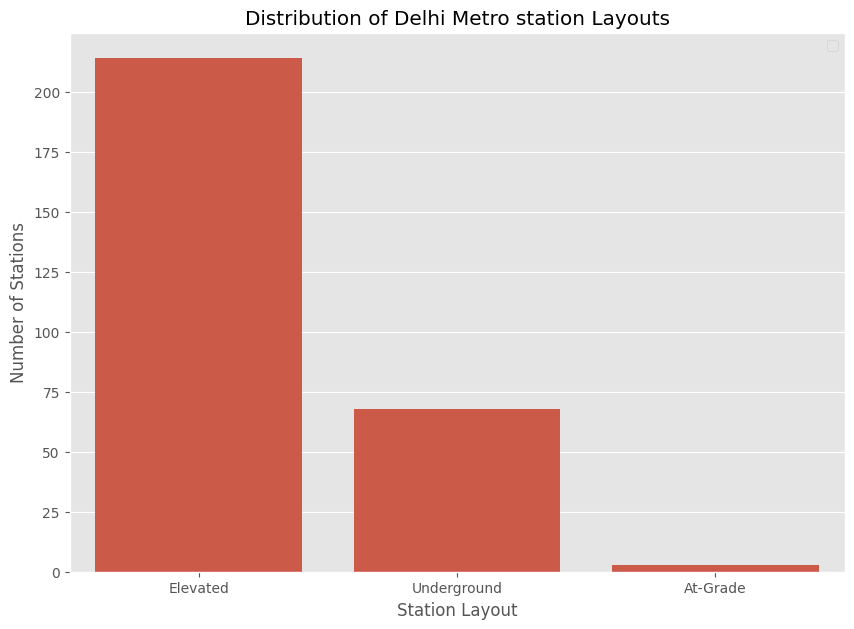

In [34]:
plt.figure( figsize = (10,7))
sns.barplot(x = layout_counts.index , y = layout_counts.values)
plt.title('Distribution of Delhi Metro station Layouts')
plt.ylabel("Number of Stations")
plt.legend()
plt.savefig(r"C:\Users\areeb\Downloads\Distribution of Delhi Metro station Layouts.png" , bbox_inches='tight')
plt.show()

The bar chart and the counts show the distribution of different station layouts in the Delhi Metro network.

# Observations


Elevated Stations: The majority of the stations are Elevated. It is a common design choice in urban areas to save space and reduce land acquisition issues.

Underground Stations: The Underground stations are fewer compared to elevated ones. These are likely in densely populated or central areas where above-ground construction is less feasible.

At-Grade Stations: There are only a few At-Grade (ground level) stations, suggesting they are less common in the network, possibly due to land and traffic considerations.

# Summary

Metro Network Analysis involves examining the network of metro systems to understand their structure, efficiency, and effectiveness. It typically includes analyzing routes, stations, traffic, connectivity, and other operational aspects.